In [20]:
# Import Labriary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import os

In [ ]:
# Read dataset
base_path = '/content/drive/MyDrive/Colab Notebooks/Practice/소상공인 데이터 분석/소상공인시장진흥공단_상가(상권)정보_20201231/'

file_names = glob(base_path + "*.csv")
file_names

total = pd.DataFrame()
for file_name in file_names:
  temp = pd.read_csv(file_name, sep='|')
  total = pd.concat([total, temp])

In [4]:
# Reset index
total.reset_index(drop= True, inplace= True)
total.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17163092,도전최강달인왕만두,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1174010200102170000018014,고덕그라시움,서울특별시 강동구 고덕로 333,134082.0,5224.0,NaN,NaN,NaN,127.159471,37.556197
1,17120456,이때,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1144012400103900067027687,NaN,서울특별시 마포구 동교로38안길 7,121867.0,3982.0,NaN,NaN,NaN,126.924660,37.562176
2,17175350,L.A.D,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1144012000103950112010755,NaN,서울특별시 마포구 잔다리로3안길 23,121840.0,4043.0,NaN,NaN,NaN,126.919845,37.550689
3,17175311,제이씨에스푸드,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1162010200101180033018722,NaN,서울특별시 관악구 신림로14길 3,151856.0,8839.0,NaN,NaN,NaN,126.937790,37.471190
4,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1171011300100360000022458,성암빌딩,서울특별시 송파구 오금로 527,138110.0,5768.0,NaN,1,NaN,127.147321,37.493054


In [5]:
# Check Columns
total.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [39]:
# Make df about cafe
df = total[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '위도', '경도']]
df_cafes = df[(df['상권업종대분류명']== '음식') & (df['상권업종중분류명']== '커피점/카페')]
df_cafes.reset_index(drop= True, inplace= True)
df_cafes.head()
len(df_cafes)

113705

In [7]:
#  Filtering in Seoul
df_cafes_seoul = df_cafes[df_cafes['시도명']== '서울특별시']
df_cafes_seoul
len(df_cafes_seoul)

22239

In [57]:
# Each franchise's number of stores in the country and Seoul

# Starbucks
df_starbucks = df_cafes[df_cafes['상호명'].str.contains('스타벅스')]
df_starbucks_seoul = df_cafes_seoul[df_cafes_seoul['상호명'].str.contains('스타벅스')]
s = len(df_starbucks)
st = len(df_starbucks_seoul)

# Twosome place
df_twosome = df_cafes[df_cafes['상호명'].str.contains('투썸')]
df_twosome_seoul = df_cafes_seoul[df_cafes_seoul['상호명'].str.contains('투썸')]
a= len(df_twosome)
b= len(df_twosome_seoul)

# Ediya
df_ediya = df_cafes[df_cafes['상호명'].str.contains('이디야')]
df_ediya_seoul =  df_cafes_seoul[df_cafes_seoul['상호명'].str.contains('이디야')]
a1= len(df_ediya)
b1= len(df_ediya_seoul)

# Bbaek Dabang
df_bbaek = df_cafes[df_cafes['상호명'].str.contains('빽다방')]
df_bbaek_seoul =  df_cafes_seoul[df_cafes_seoul['상호명'].str.contains('빽다방')]
a2= len(df_bbaek)
b2= len(df_bbaek_seoul)

# Coffeebean
df_coffeebean = df_cafes[df_cafes['상호명'].str.contains('커피빈')]
df_coffeebean_seoul =  df_cafes_seoul[df_cafes_seoul['상호명'].str.contains('커피빈')]
a3= len(df_coffeebean)
b3= len(df_coffeebean_seoul)

# Hollys
df_hollys = df_cafes[df_cafes['상호명'].str.contains('할리스')]
df_hollys_seoul =  df_cafes_seoul[df_cafes_seoul['상호명'].str.contains('할리스')]
a4= len(df_hollys)
b4= len(df_hollys_seoul)

# Mega Coffee
df_mega = df_cafes[df_cafes['상호명'].str.contains('커피빈')]
df_mega_seoul =  df_cafes_seoul[df_cafes_seoul['상호명'].str.contains('커피빈')]
a5= len(df_mega)
b5= len(df_mega_seoul)

In [40]:
# Summarize rates of big 5 franchises in the country(South Korea)

print("**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****")

print("1. 스타벅스 : %.3f%%" % (len(df_starbucks) / len(df_cafes) * 100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_twosome) / len(df_cafes) * 100))
print("3. 이디야 : %.3f%%" % (len(df_ediya) / len(df_cafes) * 100))
print("4. 할리스 : %.3f%%" % (len(df_hollys) / len(df_cafes) * 100))
print("5. 메가커피 : %.3f%%" % (len(df_mega) / len(df_cafes) * 100))
print("5대 브랜드의 합 : %.3f%%" % ((len(df_starbucks) + len(df_twosome)
                    + len(df_ediya) + len(df_hollys) + len(df_mega)) / len(df_cafes)
                    * 100))

**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****
1. 스타벅스 : 1.419%
2. 투썸플레이스 : 1.003%
3. 이디야 : 1.968%
4. 할리스 : 0.622%
5. 메가커피 : 0.285%
5대 브랜드의 합 : 5.297%


In [58]:
# Summarize rates of big 5 franchises in Seoul

print("**** 서울 커피전문점중 주요 5대 커피브랜드 입점 비율 ****")

print("1. 스타벅스 : %.3f%%" % (len(df_starbucks_seoul) / len(df_cafes) * 100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_twosome_seoul) / len(df_cafes) * 100))
print("3. 이디야 : %.3f%%" % (len(df_ediya_seoul) / len(df_cafes) * 100))
print("4. 할리스 : %.3f%%" % (len(df_hollys_seoul) / len(df_cafes) * 100))
print("5. 메가커피 : %.3f%%" % (len(df_mega_seoul) / len(df_cafes) * 100))
print("5대 브랜드의 합 : %.3f%%" % ((len(df_starbucks_seoul) + len(df_twosome_seoul)
                    + len(df_ediya_seoul) + len(df_hollys_seoul) + len(df_mega_seoul)) / len(df_cafes_seoul)
                    * 100))

**** 서울 커피전문점중 주요 5대 커피브랜드 입점 비율 ****
1. 스타벅스 : 0.448%
2. 투썸플레이스 : 0.252%
3. 이디야 : 0.417%
4. 할리스 : 0.176%
5. 메가커피 : 0.168%
5대 브랜드의 합 : 7.464%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


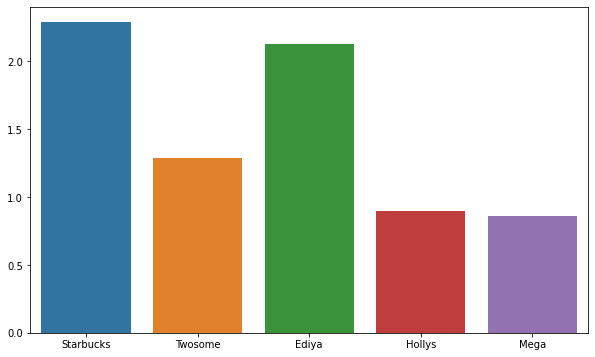

In [59]:
# Make a chart about rates of big 5 franchises in Seoul

plt.figure(figsize=(10,6))
store = ['Starbucks', 'Twosome', 'Ediya', 'Hollys', 'Mega']
num = list(np.array([st, b, b1, b4, b5]) / len(df_cafes_seoul) * 100)
sns.barplot(store, num)
plt.show()